In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import GridSearchCV
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/sboyukliyski/Downloads/Graphviz/bin/'

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [4]:
def col_to_cat(training_data):
    training_data_copy = training_data.copy()
    for column in training_data_copy:
        if training_data_copy[column].dtype == object:
            integer = 0
            for unique_col in training_data_copy[column].unique():
                integer += 1
                training_data_copy.loc[training_data_copy[column] == unique_col , column] = float(integer)
        else:
            pass
    return training_data_copy

In [5]:
train = pd.read_csv('train.csv')

In [6]:
total_dataset = train
total_dataset_nnull = total_dataset[total_dataset['SalePrice'].notnull()]

In [7]:
features_selected_dataset = total_dataset_nnull.drop(['Id','Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1)

In [8]:
def MSE(Y_pred, Y_test):
    return np.sum((Y_test-Y_pred)**2)/len(Y_test)

In [9]:
def pca_op(X, inc_pca = False, n_comp =20):
    if inc_pca:
        pca = PCA(n_components=n_comp, svd_solver = 'full')
        principalComponents = pca.fit_transform(X)
        return pd.DataFrame(data = principalComponents)
    else:
        return X

In [25]:
def train_xgboost(dataset, inc_pca = False, n_comp = 25, num_round = 100):
    
    X, Y = dataset.drop('SalePrice', axis = 1).fillna(0), dataset['SalePrice'].to_numpy('float32')
    X = col_to_cat(X)
    X = pca_op(X, inc_pca = inc_pca, n_comp = n_comp)

    X_train, X_test = train_test_split(X, test_size=0.2, random_state=25)
    X_train, X_val = train_test_split(X_train, test_size = 0.2, random_state = 25)
    
    Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=25)
    Y_train, Y_val = train_test_split(Y_train, test_size = 0.2, random_state = 25)
    
    X_train = col_to_cat(X_train).astype('float32')
    X_test = col_to_cat(X_test).astype('float32')
    X_val = col_to_cat(X_val).astype('float32')
    
    dtrain = xgb.DMatrix(data=X_train,label=Y_train, missing=np.NaN)
    dtest = xgb.DMatrix(data=X_test,label=Y_test, missing=np.NaN)
    
    param = {'max_depth': 4, 
             'eta': 1,
             'objective': 'reg:squarederror'}
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    num_round = num_round
    bst = xgb.train(param, dtrain, num_round, evallist)

    return bst

In [14]:
bst = train_xgboost(features_selected_dataset, inc_pca = True, n_comp = 10, num_round = 1000)

[0]	eval-rmse:58674.55793	train-rmse:41657.50650
[1]	eval-rmse:58721.53596	train-rmse:33269.27881
[2]	eval-rmse:57335.96094	train-rmse:29792.31726
[3]	eval-rmse:57337.94955	train-rmse:27667.50251
[4]	eval-rmse:57187.60184	train-rmse:25806.82747
[5]	eval-rmse:57313.00986	train-rmse:23848.98943
[6]	eval-rmse:56338.05252	train-rmse:22723.81223
[7]	eval-rmse:56374.18979	train-rmse:22212.71347
[8]	eval-rmse:57254.37844	train-rmse:20230.08769
[9]	eval-rmse:57437.37839	train-rmse:19402.29808
[10]	eval-rmse:57782.24202	train-rmse:18750.32926
[11]	eval-rmse:58555.47747	train-rmse:17862.62218
[12]	eval-rmse:58698.76437	train-rmse:16785.06309
[13]	eval-rmse:58555.66993	train-rmse:16114.74962
[14]	eval-rmse:58629.24092	train-rmse:15558.72797
[15]	eval-rmse:58827.78038	train-rmse:15285.14440
[16]	eval-rmse:58867.02036	train-rmse:14971.61075
[17]	eval-rmse:58961.17085	train-rmse:14449.06273
[18]	eval-rmse:59120.44737	train-rmse:13873.45348
[19]	eval-rmse:59215.32469	train-rmse:13662.95505
[20]	eval-

C:\Users\sboyukliyski\Anaconda3\envs\tf\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[60]	eval-rmse:59449.87241	train-rmse:3256.30717
[61]	eval-rmse:59428.94495	train-rmse:3135.58123
[62]	eval-rmse:59464.59694	train-rmse:3040.16037
[63]	eval-rmse:59487.39011	train-rmse:2936.08263
[64]	eval-rmse:59469.76059	train-rmse:2874.47353
[65]	eval-rmse:59509.64028	train-rmse:2826.24212
[66]	eval-rmse:59545.51262	train-rmse:2742.94151
[67]	eval-rmse:59583.05411	train-rmse:2666.09300
[68]	eval-rmse:59568.78317	train-rmse:2541.34748
[69]	eval-rmse:59563.48134	train-rmse:2488.17739
[70]	eval-rmse:59566.92754	train-rmse:2406.20859
[71]	eval-rmse:59555.39335	train-rmse:2337.39745
[72]	eval-rmse:59571.59898	train-rmse:2311.88798
[73]	eval-rmse:59572.87219	train-rmse:2248.55958
[74]	eval-rmse:59562.03180	train-rmse:2211.01758
[75]	eval-rmse:59547.56327	train-rmse:2174.86523
[76]	eval-rmse:59533.80655	train-rmse:2122.39137
[77]	eval-rmse:59519.10032	train-rmse:2095.80442
[78]	eval-rmse:59525.16617	train-rmse:2027.76756
[79]	eval-rmse:59531.33640	train-rmse:1982.75037
[80]	eval-rmse:59524

[229]	eval-rmse:59448.92733	train-rmse:23.43320
[230]	eval-rmse:59448.66346	train-rmse:22.54744
[231]	eval-rmse:59449.00230	train-rmse:21.58948
[232]	eval-rmse:59448.97970	train-rmse:20.88294
[233]	eval-rmse:59448.70084	train-rmse:20.50207
[234]	eval-rmse:59449.00567	train-rmse:20.05965
[235]	eval-rmse:59448.93873	train-rmse:19.76306
[236]	eval-rmse:59448.77540	train-rmse:19.38561
[237]	eval-rmse:59448.62479	train-rmse:18.47241
[238]	eval-rmse:59448.75398	train-rmse:17.94603
[239]	eval-rmse:59448.68375	train-rmse:17.37653
[240]	eval-rmse:59448.57795	train-rmse:16.78696
[241]	eval-rmse:59448.64399	train-rmse:16.39068
[242]	eval-rmse:59448.73335	train-rmse:16.09142
[243]	eval-rmse:59448.25113	train-rmse:15.78363
[244]	eval-rmse:59448.45632	train-rmse:15.29626
[245]	eval-rmse:59448.34080	train-rmse:14.70201
[246]	eval-rmse:59447.96251	train-rmse:14.12323
[247]	eval-rmse:59447.99417	train-rmse:13.87290
[248]	eval-rmse:59447.98007	train-rmse:13.39996
[249]	eval-rmse:59448.15661	train-rmse:1

[403]	eval-rmse:59447.74018	train-rmse:0.13773
[404]	eval-rmse:59447.74299	train-rmse:0.13389
[405]	eval-rmse:59447.74171	train-rmse:0.12942
[406]	eval-rmse:59447.74162	train-rmse:0.12377
[407]	eval-rmse:59447.74054	train-rmse:0.12141
[408]	eval-rmse:59447.73907	train-rmse:0.11943
[409]	eval-rmse:59447.73768	train-rmse:0.11321
[410]	eval-rmse:59447.73662	train-rmse:0.10978
[411]	eval-rmse:59447.73428	train-rmse:0.10764
[412]	eval-rmse:59447.73355	train-rmse:0.10413
[413]	eval-rmse:59447.73471	train-rmse:0.09985
[414]	eval-rmse:59447.73516	train-rmse:0.09709
[415]	eval-rmse:59447.73683	train-rmse:0.09220
[416]	eval-rmse:59447.73492	train-rmse:0.08980
[417]	eval-rmse:59447.73567	train-rmse:0.08887
[418]	eval-rmse:59447.73670	train-rmse:0.08492
[419]	eval-rmse:59447.73564	train-rmse:0.08253
[420]	eval-rmse:59447.73525	train-rmse:0.08098
[421]	eval-rmse:59447.73454	train-rmse:0.07845
[422]	eval-rmse:59447.73465	train-rmse:0.07716
[423]	eval-rmse:59447.73449	train-rmse:0.07481
[424]	eval-rm

[578]	eval-rmse:59447.73523	train-rmse:0.00038
[579]	eval-rmse:59447.73523	train-rmse:0.00038
[580]	eval-rmse:59447.73523	train-rmse:0.00038
[581]	eval-rmse:59447.73523	train-rmse:0.00038
[582]	eval-rmse:59447.73523	train-rmse:0.00038
[583]	eval-rmse:59447.73523	train-rmse:0.00038
[584]	eval-rmse:59447.73523	train-rmse:0.00038
[585]	eval-rmse:59447.73523	train-rmse:0.00038
[586]	eval-rmse:59447.73523	train-rmse:0.00038
[587]	eval-rmse:59447.73523	train-rmse:0.00038
[588]	eval-rmse:59447.73523	train-rmse:0.00038
[589]	eval-rmse:59447.73523	train-rmse:0.00038
[590]	eval-rmse:59447.73523	train-rmse:0.00038
[591]	eval-rmse:59447.73523	train-rmse:0.00038
[592]	eval-rmse:59447.73523	train-rmse:0.00038
[593]	eval-rmse:59447.73523	train-rmse:0.00038
[594]	eval-rmse:59447.73523	train-rmse:0.00038
[595]	eval-rmse:59447.73523	train-rmse:0.00038
[596]	eval-rmse:59447.73523	train-rmse:0.00038
[597]	eval-rmse:59447.73523	train-rmse:0.00038
[598]	eval-rmse:59447.73523	train-rmse:0.00038
[599]	eval-rm

[753]	eval-rmse:59447.73523	train-rmse:0.00038
[754]	eval-rmse:59447.73523	train-rmse:0.00038
[755]	eval-rmse:59447.73523	train-rmse:0.00038
[756]	eval-rmse:59447.73523	train-rmse:0.00038
[757]	eval-rmse:59447.73523	train-rmse:0.00038
[758]	eval-rmse:59447.73523	train-rmse:0.00038
[759]	eval-rmse:59447.73523	train-rmse:0.00038
[760]	eval-rmse:59447.73523	train-rmse:0.00038
[761]	eval-rmse:59447.73523	train-rmse:0.00038
[762]	eval-rmse:59447.73523	train-rmse:0.00038
[763]	eval-rmse:59447.73523	train-rmse:0.00038
[764]	eval-rmse:59447.73523	train-rmse:0.00038
[765]	eval-rmse:59447.73523	train-rmse:0.00038
[766]	eval-rmse:59447.73523	train-rmse:0.00038
[767]	eval-rmse:59447.73523	train-rmse:0.00038
[768]	eval-rmse:59447.73523	train-rmse:0.00038
[769]	eval-rmse:59447.73523	train-rmse:0.00038
[770]	eval-rmse:59447.73523	train-rmse:0.00038
[771]	eval-rmse:59447.73523	train-rmse:0.00038
[772]	eval-rmse:59447.73523	train-rmse:0.00038
[773]	eval-rmse:59447.73523	train-rmse:0.00038
[774]	eval-rm

[928]	eval-rmse:59447.73523	train-rmse:0.00038
[929]	eval-rmse:59447.73523	train-rmse:0.00038
[930]	eval-rmse:59447.73523	train-rmse:0.00038
[931]	eval-rmse:59447.73523	train-rmse:0.00038
[932]	eval-rmse:59447.73523	train-rmse:0.00038
[933]	eval-rmse:59447.73523	train-rmse:0.00038
[934]	eval-rmse:59447.73523	train-rmse:0.00038
[935]	eval-rmse:59447.73523	train-rmse:0.00038
[936]	eval-rmse:59447.73523	train-rmse:0.00038
[937]	eval-rmse:59447.73523	train-rmse:0.00038
[938]	eval-rmse:59447.73523	train-rmse:0.00038
[939]	eval-rmse:59447.73523	train-rmse:0.00038
[940]	eval-rmse:59447.73523	train-rmse:0.00038
[941]	eval-rmse:59447.73523	train-rmse:0.00038
[942]	eval-rmse:59447.73523	train-rmse:0.00038
[943]	eval-rmse:59447.73523	train-rmse:0.00038
[944]	eval-rmse:59447.73523	train-rmse:0.00038
[945]	eval-rmse:59447.73523	train-rmse:0.00038
[946]	eval-rmse:59447.73523	train-rmse:0.00038
[947]	eval-rmse:59447.73523	train-rmse:0.00038
[948]	eval-rmse:59447.73523	train-rmse:0.00038
[949]	eval-rm

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

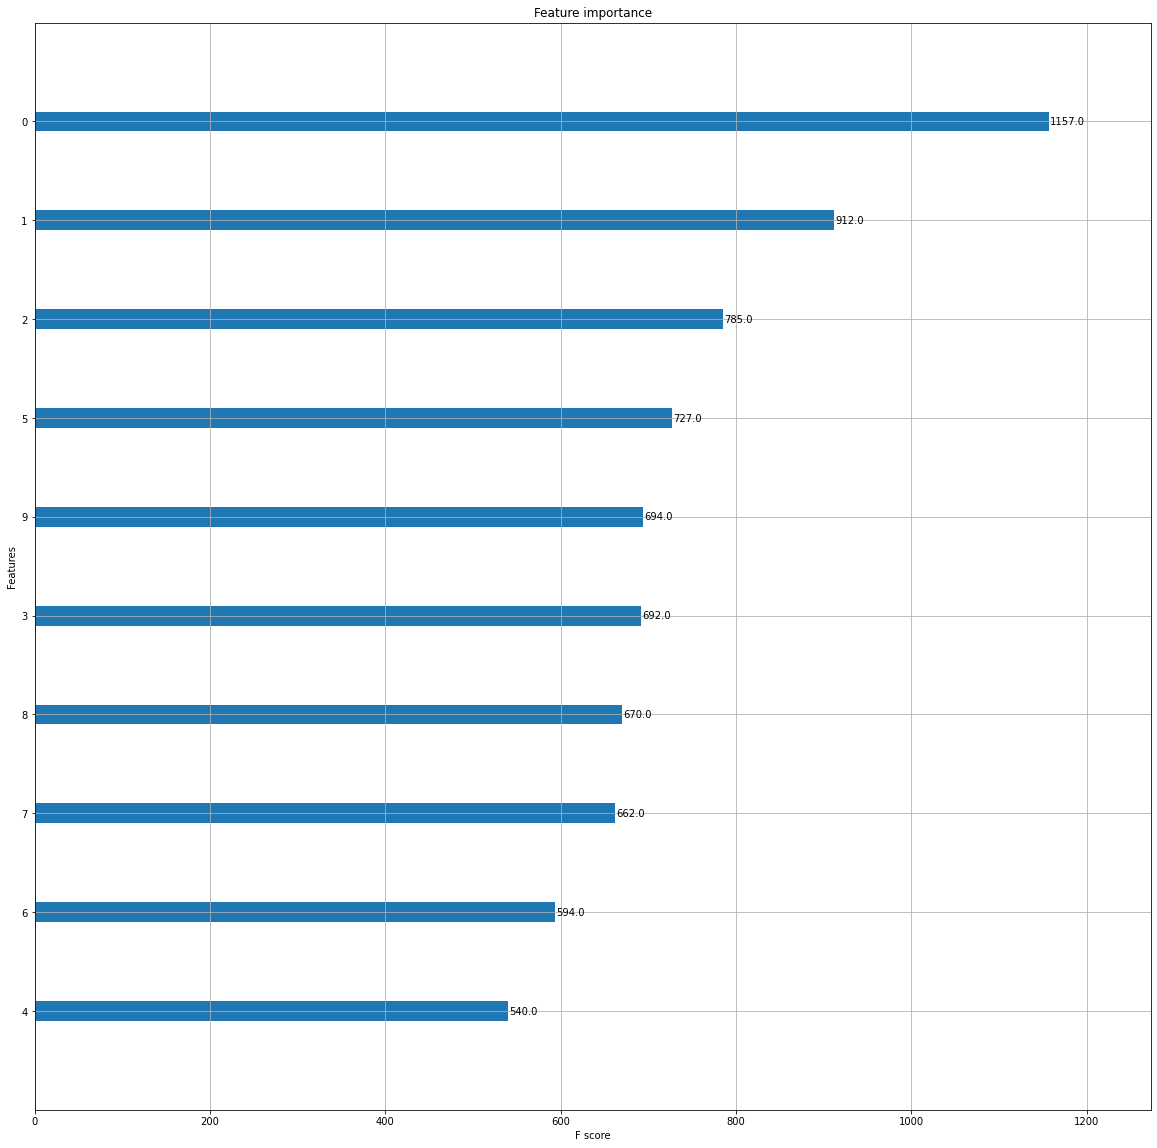

In [15]:
fig, ax = plt.subplots(figsize = (20,20))
xgb.plot_importance(bst, ax = ax)

<AxesSubplot:>

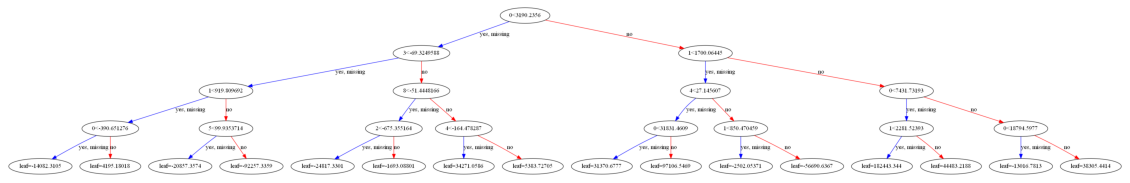

In [16]:
fig, ax = plt.subplots(figsize = (20,10))
xgb.plot_tree(bst, num_trees=1, ax = ax)

In [17]:
test = pd.read_csv('test.csv')
test = test.drop(['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],  axis =1)

test = col_to_cat(test)
X, id_t = test.drop('Id', axis = 1).fillna(0), test['Id']
dtotal= xgb.DMatrix(data=X, missing=np.NaN)

In [18]:
ypred = pd.DataFrame(bst.predict(dtotal), columns = ['SalePrice'])
ypred['Id'] = id_t

ValueError: feature_names mismatch: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
expected 0, 6, 8, 2, 1, 7, 5, 9, 4, 3 in input data
training data did not have the following fields: LowQualFinSF, OpenPorchSF, GarageQual, FullBath, RoofStyle, OverallCond, 2ndFlrSF, YearRemodAdd, Condition2, Neighborhood, Electrical, Utilities, ExterQual, LandContour, GrLivArea, Fireplaces, WoodDeckSF, MasVnrArea, Functional, Foundation, MoSold, BsmtCond, TotRmsAbvGrd, CentralAir, ExterCond, BedroomAbvGr, PavedDrive, Condition1, Exterior2nd, HouseStyle, BldgType, BsmtFinSF2, HeatingQC, LotArea, LandSlope, BsmtExposure, SaleType, MSZoning, GarageCond, EnclosedPorch, PoolArea, MasVnrType, LotFrontage, 3SsnPorch, MSSubClass, BsmtFullBath, YearBuilt, RoofMatl, TotalBsmtSF, HalfBath, GarageArea, MiscVal, BsmtHalfBath, LotConfig, YrSold, ScreenPorch, BsmtFinType1, Street, BsmtQual, BsmtUnfSF, Exterior1st, GarageType, KitchenAbvGr, BsmtFinType2, SaleCondition, Heating, 1stFlrSF, OverallQual, GarageYrBlt, LotShape, KitchenQual, GarageFinish, GarageCars, BsmtFinSF1

In [ ]:
ypred.set_index('Id').to_csv('model.csv')

In [60]:
ypred

SalePrice    Id
0      97956.687500  1461
1     172749.640625  1462
2     204079.828125  1463
3     223610.156250  1464
4     154206.421875  1465
...             ...   ...
1454   85218.335938  2915
1455   76165.710938  2916
1456  209661.250000  2917
1457  131190.734375  2918
1458  208595.687500  2919

[1459 rows x 2 columns]